In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy

In [2]:
call_hours_customers = [2, 3, 4, 5, 6, 1.5, 5, 7, 8, 10]
money_earned = [50, 70, 90, 100, 110, 40, 110, 130, 145, 180]

dict = {'call_hours_customers':call_hours_customers, 'money_earned':money_earned}
df = pd.DataFrame(dict)
df_copy = df.copy()
df_copy.head()

,call_hours_customers,money_earned
0,2.0,50
1,3.0,70
2,4.0,90
3,5.0,100
4,6.0,110


In [3]:
x = df_copy.drop('money_earned', axis=1)
y = df_copy['money_earned']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
print(model.predict(X_test))
print(y_test)

[147.99242424  69.77272727  46.30681818]
8    145
1     70
5     40
Name: money_earned, dtype: int64


In [6]:
test_prediction = model.predict(X_test)
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)
y_mean = y.mean()
print(f'MAE error in our model is {MAE}')
print(f'MSE error in our model is {MSE}')
print(f'RMSE error in our model is {RMSE}')

MAE error in our model is 3.175505050505057
MSE error in our model is 16.26073710590771
RMSE error in our model is 4.0324604283126835


In [7]:
y_mean = y.mean()
test_prediction = model.predict(X_test)
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)
print(f'MAE error percent in our model is {MAE/y_mean*100}%')
print(f'MSE error percent in our model is {MSE/y_mean*100}%')
print(f'RMSE error percent in our model is {RMSE/y_mean*100}%')

MAE error percent in our model is 3.0980537078098114%
MSE error percent in our model is 15.864133761861183%
RMSE error percent in our model is 3.9341077349392033%


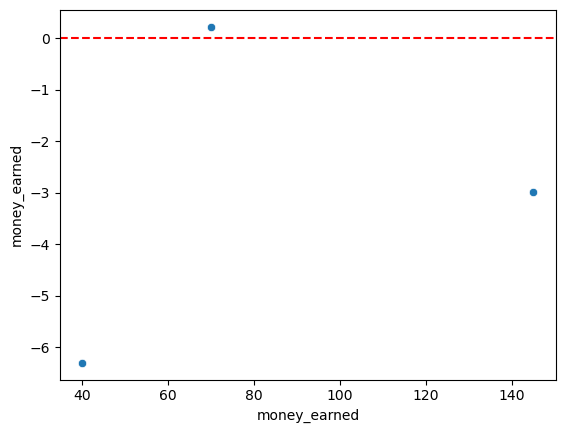

In [8]:
test_residuals = y_test - test_prediction
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.show()

In [9]:
# Class Exercise - Deploying Model 22/01/25

In [10]:
from joblib import dump, load
model.fit(x, y)
final_model = model
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [11]:
loaded_model = load('final_model.joblib')

In [12]:
loaded_model.coef_

array([15.85928489])

In [13]:
x.shape

(10, 1)

In [14]:
new_hours = [[5.5], [15]]
loaded_model.predict(new_hours)

/home/elloukelie/anaconda3/envs/ecom/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([108.05074971, 258.71395617])

In [15]:
# Class Exercise - Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# Train the model on 6 different polynomial regression degrees (from 1 to 6 included)

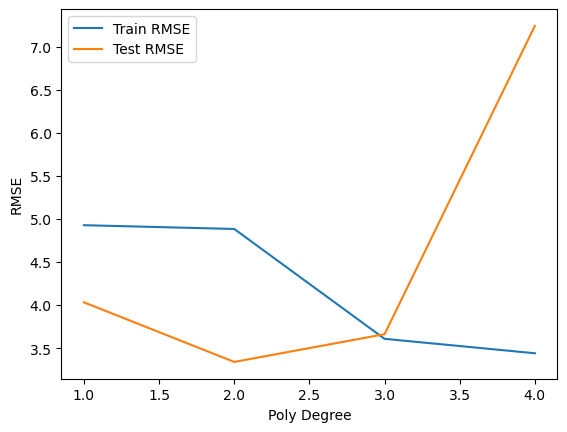

In [18]:
train_rmse_error = []
test_rmse_error = []

for degree in range(1, 7):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

plt.plot(range(1,5), train_rmse_error[:4], label='Train RMSE')
plt.plot(range(1,5), test_rmse_error[:4], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Poly Degree')
plt.legend()
plt.show()

In [19]:
# Find what is the best fit degree for polynomial regression training
# Best fit should be at 2rd Degree 

In [20]:
# Create a final model using the degree you chose and deploy it

In [21]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_converter.fit_transform(x)
model.fit(poly_features, y)

LinearRegression()

In [22]:
# Import your final model from the joblib file and load it back to your working area

In [23]:
final_poly_model = model
dump(final_poly_model, 'final_poly_model.joblib')
dump(poly_converter, 'final_converter.joblib')


['final_converter.joblib']

In [24]:
# Use the import model to predict how much money will be earned with the following new hours of
# calling customers [5.5, 15] 

In [25]:
loaded_final_poly_model = load('final_poly_model.joblib')
final_converter = load('final_converter.joblib')

new_hours = [[5.5], [15]]

poly_features = final_converter.fit_transform(new_hours)
loaded_final_poly_model.predict(poly_features)

array([109.34604763, 242.67573342])

In [26]:
df = pd.read_csv('csvs/Advertising.csv')

In [27]:
df_copy = df.copy()
df_copy.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
X = df_copy.drop('sales', axis=1)
y = df_copy['sales']

In [29]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)
ridge_model.fit(scaled_X_train, y_train)
test_prediction = ridge_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 0.5774404204714183
RMSE: 0.8946386461319686


In [33]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(scaled_X_train, y_train)
test_prediction = ridge_cv_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 0.42737748843373746
RMSE: 0.6180719926921404


In [34]:
ridge_cv_model.alpha_

0.1

In [35]:
call_hours_customers = [2, 3, 4, 5, 6, 1.5, 5, 7, 8, 10]
money_earned = [50, 70, 90, 100, 110, 40, 110, 130, 145, 180]

dict = {'call_hours_customers':call_hours_customers, 'money_earned':money_earned}
df = pd.DataFrame(dict)
df_copy = df.copy()

X = df_copy.drop('money_earned', axis=1)
y = df_copy['money_earned']

In [36]:
# Convert your model data to be with polynomial regression of 4 degree

In [37]:
poly_converter = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [38]:
# Use feature scaling of type Normalization to prepare your data set

In [39]:
from sklearn.preprocessing import Normalizer
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
normalizer = Normalizer()
normalizer.fit(X_train)
normalised_X_train = normalizer.transform(X_train)
normalised_X_test = normalizer.transform(X_test)

In [40]:
# Use basic Ridge model to eliminate overfitting and choose alpha value of 5
# ● Print the MAE and RMSE results of your model

In [41]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=5)
ridge_model.fit(normalised_X_train, y_train)
test_prediction = ridge_model.predict(normalised_X_test)

MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 35.75525639984236
RMSE: 38.92013772279595


In [42]:
# Use RidgeCV and find what is the optimal alpha value for range between 1 to 10 with jumps of
# 0.1 and use ‘neg_root_mean_squared_error’ as the score metric

In [43]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_root_mean_squared_error')
ridge_cv_model.fit(normalised_X_train, y_train)
test_prediction = ridge_cv_model.predict(normalised_X_test)

MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 19.70446774257445
RMSE: 19.777209345929325


In [44]:
# Print the beta coefficients your model found for each feature

In [45]:
ridge_cv_model.coef_

array([ -29.18844731,  -58.13028293, -109.233195  ,   36.41395665])

In [46]:
# Print the optimal alpha and the score value that this alpha got

In [47]:
ridge_cv_model.alpha_

0.1